<a href="https://colab.research.google.com/github/Crovargr/CodeCamp/blob/main/Data_Week_Giorno_3_Data_wrangling_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling con pandas

Boolean Data Week | novembre 2024

![pandas](https://cdn.prod.website-files.com/655926fa24195711dbf38624/662815b1f8e7ea8ce6c88ccb_Pandas-logo.webp)

## La libreria Pandas



Pandas è la libreria più utilizzata nell'analisi dei dati, infatti permette di caricare un dataset in Python e salvarlo in un particolare oggetto chiamato **Data Frame**, il quale è un insieme di righe e colonne che può essere visto come una matrice indicizzata (di fatto possiamo paragonarlo alla tipica tabella che troviamo nei fogli di calcolo).

Per prima cosa dobbiamo importare la libreria ed è uso comune importare `pandas` utilizzando l'alias `pd` per un semplice motivo di praticità:

In [ ]:
import pandas as pd

### Caricare i dati

Ci sono diverse modalità per caricare dei dati, i quali possono essere in diversi formati. Iniziamo caricando un dataset in [formato csv](https://www.html.it/articoli/file-csv-cosa-sono-come-si-aprono-e-come-crearli/) (che sta per comma separated values) e che è stato salvato in [questa pagina web](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv):

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Il dataset, che abbiamo appena salvato come **Data Frame** su un oggetto di nome `df`, contiene dati sulle misurazioni di caratteristiche fisiche di alcune popolazioni di pinguini.

Possiamo usare il metodo `.info()` sul nostro Data Frame `df` per ottenere delle informazioni generali sulla composizione dei nostri dati:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Oltre a fornirci informazioni sui nomi delle colonne e sulla tipologia di variabile (stringa o numerica), l'output ci dice anche quante righe ci sono nel dataset e se e quanti valori mancanti ci sono per ciascuna colonna; ad esempio:

*  la colonna `species` non ha valori mancanti
*  la colonna `sex` ha 344 - 333 = 11 valori mancanti

### Gestire i dati

Pandas offre diversi **attributi** e **metodi** che possono essere applicati agli oggetti di tipo Data Frame:
- un *attributo è un dato o una funzione che specifica una caratteristica* di un oggetto;
- un *metodo è una funzione che esegue delle operazioni su un oggetto*;
- questi oggetti sono a loro volta stati instanziati da una **classe**, come ad esempio la classe DataFrame.

> 📚 Dai un'occhiata a [questo articolo](https://towardsdatascience.com/explaining-python-classes-in-a-simple-way-e3742827c8b5) per un'introduzione soft al tema delle classi in Python.  

#### Slicing

Come abbiamo visto per le stringhe, è possibile indicizzare anche i DataFrame, i quali hanno un doppio indice: uno per le righe e uno per le colonne del dataset. Ci sono [diversi modi](https://pandas.pydata.org/docs/user_guide/indexing.html) per ottenere una specifica riga o colonna da un Data Frame ma, per non confondere troppo le idee, ne vedremo solo alcuni.

**Slicing per riga**

L'indicatore `.loc[]` ci permette di individuare una certa riga andando a specificare il "label" della riga (in questo caso l'indice stesso) che vogliamo ottenere:

In [ ]:
df.loc[9]

,9
species,Adelie
island,Torgersen
bill_length_mm,42.0
bill_depth_mm,20.2
flipper_length_mm,190.0
body_mass_g,4250.0
sex,NaN


In [ ]:
# per selezionare più righe
df.loc[[2,9]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


**Slicing per colonna**

L'indicatore `.loc[]` funziona anche per le colonne, ma questa volta dovremo andare a specificare il fatto che siamo interessati a queste (e non alle righe). Per fare ciò usiamo l'operatore `:` per chiedere di restituire **tutte le righe** e dopo la `,` specifichiamo la colonna (o le colonne) che vogliamo selezionare:

In [ ]:
df.loc[:,'bill_length_mm']

,bill_length_mm
0,39.1
1,39.5
2,40.3
3,NaN
4,36.7
...,...
339,NaN
340,46.8
341,50.4
342,45.2


In [ ]:
# per selezionare specifiche righe e colonne
df.loc[:10,['species','bill_length_mm']]

,species,bill_length_mm
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
3,Adelie,NaN
4,Adelie,36.7
5,Adelie,39.3
6,Adelie,38.9
7,Adelie,39.2
8,Adelie,34.1
9,Adelie,42.0


Dato che selezionare una o più colonne è un'operazione molto comune, c'è anche un metodo più pratico e veloce per fare questa operazione:

In [ ]:
df['bill_length_mm']

,bill_length_mm
0,39.1
1,39.5
2,40.3
3,NaN
4,36.7
...,...
339,NaN
340,46.8
341,50.4
342,45.2


Per selezionare più colonne dovremo usare due volte l'operatore `[[]]`:

In [ ]:
df[['species','bill_length_mm']]

,species,bill_length_mm
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
3,Adelie,NaN
4,Adelie,36.7
...,...,...
339,Gentoo,NaN
340,Gentoo,46.8
341,Gentoo,50.4
342,Gentoo,45.2


#### Valori distinti

Il metodo `.unique()`, quando applicato alla colonna di un Data Frame, restituisce i **valori distinti (o unici)** contenuti in quella colonna:

In [ ]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

> ☝️ L'equivalente del metodo `.unique()` nei fogli di calcolo è la funzionalità "remove duplicates" o la funzione `=UNIQUE()`.

#### Filtrare i dati

Vediamo che nel dataset ci sono in totale tre specie di pinguini. Se volessimo **filtrare** il Data Frame e vedere solo le osservazioni appartenenti alla specie 'Gentoo' possiamo inserire una **maschera booleana** all'interno dell'operatore `[]` in questo modo:

In [ ]:
df[df['species'] == 'Gentoo']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


> ☝️ L'equivalente nei fogli di calcolo è il filtro di una colonna (il simbolo a imbuto) o la funzione `=QUERY()` con una clausola `WHERE`.

*Nota sulle boolean masks*

Nel codice scritto sopra, la *maschera booleana* è la porzione `df['species'] == 'Gentoo'`, la quale viene poi inserita all'interno di `df[]` per andare a filtrare l'intero dataset e tenere solo le righe che "rispondono" `True` alla maschera booleana.

Possiamo immaginare la maschera booleana usando l'analogia delle [maschere](https://www.slrlounge.com/old-school-photo-editing-darkroom-techniques-gave-birth-photoshop-tools/) che venivano usate nella stampa fotografica in camera oscura (e che vengono ancora usate grazie a strumenti come Photoshop).

Di fatto quello che accade quando andiamo ad applicare una maschera booleana a un Data Frame, è come se applicassimo una "maschera fisica" al nostro dataset, oscurando (filtrando) tutte le righe che non soddisfano la *condizione booleana* (ad esempio `df['species'] == 'Gentoo'`) come nell'immagine qui sotto:

<img src=https://raw.githubusercontent.com/boolean-data-analytics/img/main/data-week/boolean-mask.png width="700">


#### Funzioni di aggregazione

Se a questo punto volessimo conoscere il valor medio della colonna `body_mass_g` di questa specie di pinguini, basterebbe aggiungere alla riga precedente il metodo `.mean()` preceduto dal nome della colonna per la quale vogliamo calcolare la media, cioè `['body_mass_g']`:

In [ ]:
df[df['species']=='Gentoo']['body_mass_g'].mean()

5076.016260162602

> ☝️ L'equivalente nei fogli di calcolo sarebbe:
- usare la funzione `=AVERAGE()` sulla colonna `body_mass_g` dopo aver applicato il filtro alla variabile `species`, oppure
- usare la funzione `=QUERY()` con la clausola `WHERE` e la funzione di aggregazione `AVG()` nella clausola `SELECT`.

#### Raggruppamento dei dati

Per conoscere la media di tutte e tre le specie potremmo ripetere lo step precedente per tre volte (cambiando il nome della specie di volta in volta). Un modo più veloce ed efficiente di raggiungere lo stesso risultato è usare il metodo `.groupby()`.

In [ ]:
df.groupby('species', as_index = False)['body_mass_g'].mean()

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


> ☝️ L'equivalente del metodo `.groupby()` nei fogli di calcolo sarebbe:
- usare una tabella pivot, oppure
- usare la funzione `QUERY()` con la clausola `GROUP BY`, ricordandosi di inserire la variabile di raggruppamento e la funzione di aggregazione `AVG()` nella `SELECT`.

> *Nota: il parametro `as_index = False` specifica che vogliamo che la variabile di aggregazione (in questo caso `species`) sia visualizzata come una colonna del DataFrame (come avviene nell'output di SQL) e non come l'indice del DataFrame (che sarebbe l'output di default della `.groupby()`). Per maggiori informazioni, vedi la [documentazione](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).*

Quello di **group by** è un concetto importante nell'analisi dei dati e infatti lo si ritrova anche nel linguaggio di interrogazione SQL e, come visto qui sopra, anche nei fogli di calcolo.

Di fatto in una group by andiamo a **raggruppare tutte le righe** di una variabile che hanno la stessa categoria (ad esempio la specie dei pinguini). Una group by è sempre **seguita da una funzione di aggregazione** (come la somma, la media, ecc) perché avendo raggruppato tante righe dobbiamo riassumere le variabili numeriche con una funzione di sintesi, come ad esempio la somma o la media appunto.

Un'altra funzione di aggregazione è il conteggio, se volessimo conoscere il numero di pinguini maschi e femmine, ad esempio, potremmo raggruppare per `sex` e poi contare il numero di righe usando il metodo `.size()`:

In [ ]:
df.groupby('sex', as_index = False).size()

,sex,size
0,FEMALE,165
1,MALE,168


Naturalmente è possibile raggruppare per più di una variabile; se ad esempio volessimo raggruppare per `sex` e anche per `species`, possiamo farlo ma dobbiamo ricordarci di racchiudere le due variabili tra parentesi quadre `[]` come nel codice qui sotto:

In [ ]:
df.groupby(['sex', 'species'], as_index=False).size()

,sex,species,size
0,FEMALE,Adelie,73
1,FEMALE,Chinstrap,34
2,FEMALE,Gentoo,58
3,MALE,Adelie,73
4,MALE,Chinstrap,34
5,MALE,Gentoo,61


> 📚 Dai un'occhiata a [questo articolo](https://realpython.com/pandas-groupby/) per approfondire il metodo `groupby()` in Python; inoltre, guarda [questo video](https://www.youtube.com/watch?v=x2_mOJ3skSc&t=178s) per capire come la clausola `GROUP BY` funziona in SQL.

### Visualizzare i dati

*Oggi non vedremo questa sezione, ma ti invitiamo a darci un'occhiata!*

Ci sono svariate librerie per visualizzare i dati in Python. La più conosciuta e utilizzata è senz'altro [matplotlib](https://matplotlib.org/stable/users/getting_started/), è molto versatile e permette di creare una [moltitudine](https://matplotlib.org/stable/plot_types/index.html#) di grafici e visualizzazioni. Un'altra libreria da segnalare è [plotly](https://plotly.com/python/), molto apprezzata soprattutto per la sua interattività e versatilità.

La libreria [seaborn](https://seaborn.pydata.org/) è anch'essa molto apprezzata, sia per la sua semplicità d'utilizzo che per il fattore estetico, che a nostro giudizio batte matplotlib nonostante sia basata proprio su quest'ultima libreria ed è quindi quella che tratteremo in questa sede.

È uso comune importare `seaborn` con l'alias `sns` e subito dopo [impostare il tema](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme) con il comando `sns.set_theme()`:

In [ ]:
import seaborn as sns
sns.set_theme()

#### Distribuzione

Proviamo subito a creare un grafico. Immaginiamo di voler esplorare la **distribuzione** della massa corporea dei pinguini; un ottimo strumento per fare ciò è il **boxplot**:

<Axes: xlabel='body_mass_g'>

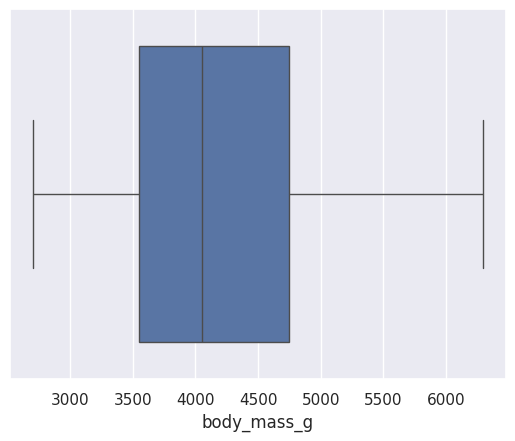

In [ ]:
sns.boxplot(data=df, x='body_mass_g')

Come interpretiamo questo grafico?
- Innanzitutto, sull'asse orizzontale leggiamo il valore della massa dei pinguini e notiamo che all'estrema sinistra e destra del grafico, ci sono delle barre verticali, questi due punti rappresentano il **minimo** e il **massimo** valore registrato nel dataset.
- Tra questi due valori, troviamo tutte le osservazioni presenti nel nostro dataset.
- All'interno dei limiti sinistro e destro della "scatola blu" troviamo il 50% delle nostre osservazioni, infatti:
  - il limite sinistro della "scatola blu" rappresenta il **primo quartile**, ovvero il punto che separa il primo 25% dei dati (a sinistra) dal restante 75% (a destra);
  - la linea in mezzo alla "scatola blu" rappresenta la **mediana**, ovvero il punto che separa il primo 50% dei dati (a sinistra) dal restante 50% (a destra);
  - il limite destro della "scatola blu" rappresenta il **terzo quartile**, ovvero il punto che separa il primo 75% dei dati (a sinistra) dal restante 25% (a destra);
- il **range interquartile** è definito come la differenza del valore al terzo quartile meno il valore al primo quartile.

Una volta capito come interpretare un boxplot (e dopo averne visti molti), questo grafico ci permette di intuire a colpo d'occhio la distribuzione di una variabile. In questo caso ad esempio, possiamo immediatamente constatare che la metà dei pinguini nel nostro dataset ha una massa compresa tra i 3.5 Kg e i 4.75 Kg. Notiamo anche che, rispetto al range totale di variazione (min - max), la distribuzione della massa corporea dei pinguini è leggermente spostata a sinistra, in direzione di masse più leggere.

È spesso utile analizzare come la distribuzione di una variabile cambi rispetto a una seconda variabile categorica; ad esempio potremmo voler vedere come la massa corporea dei pinguini cambi in base al loro sesso:

<Axes: xlabel='body_mass_g', ylabel='sex'>

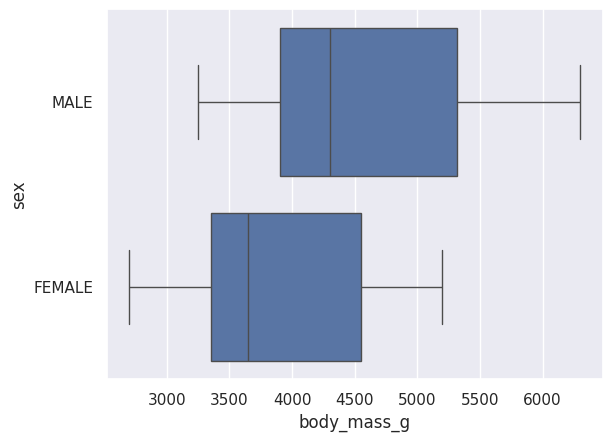

In [ ]:
sns.boxplot(data=df, x='body_mass_g', y='sex')

Come ci si poteva aspettare, in generale i pinguini maschi hanno delle masse corporee maggiori dei pinguini femmina, anche se ci sono delle notevoli sovrapposizioni: ad esempio, *l'ultimo 25% delle femmine ha una massa simile al primo 25% dei maschi*.

> 📚 Leggi questo [articolo](https://builtin.com/data-science/boxplot) per approfondire il tema della distribuzione dei dati e come leggere un Box Plot.  

#### Relazione

Quando vogliamo valutare la relazione che intercorre tra due variabili, uno dei migliori grafici che possiamo utilizzare è lo **scatterplot**, il quale ci permette di osservare come una variabile si comporta al variare dell'altra.

Possiamo usare la funzione [`sns.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) di `seaborn` per rappresentare graficamente la massa corporea dei pinguini sull'asse orizzontale e la lunghezza delle ali sull'asse verticale:

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

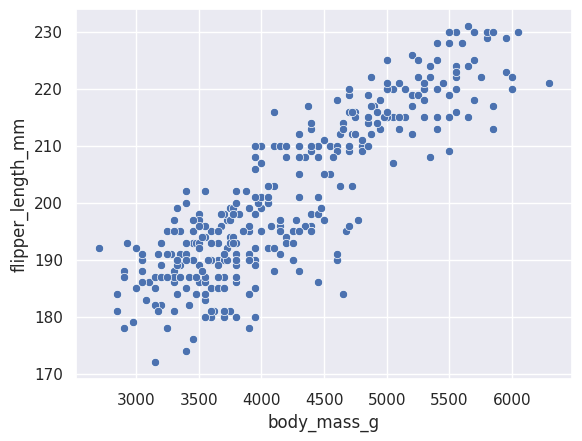

In [ ]:
sns.scatterplot(df, x='body_mass_g', y='flipper_length_mm')

Notiamo subito una relazione positiva e lineare tra le due variabili, cioè all'aumentare della lunghezza delle ali, alumenta la massa corporea in maniera proporzionale; e se ci pensiamo ha senso, più l'ala di un pinguino è lunga, più grande è il pinguino e quindi maggiore sarà la sua massa.

Possiamo anche aggiungere una variabile categorica come `sex` o `species` utilizzando il parametro `hue`:

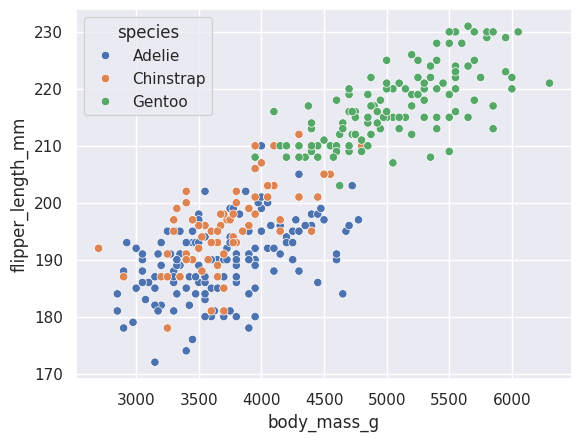

In [ ]:
ax = sns.scatterplot(data=df, x='body_mass_g', y='flipper_length_mm', hue='species')

## Pulizia del dataset TMDB

La preparazione e la pulizia dei dati sono fasi fondamentali nell'analisi dei dati, è quindi cruciale investire le giuste risorse ed energie in queste pratiche (che possono occupare gran parte del tempo di un data analyst) per garantire la qualità e l'affidabilità dei risultati che si otterranno nelle fasi successive.

I dati possono infatti contenere valori mancanti, duplicati e inconsistenze, ma possono anche aver bisogno di essere integrati con altre fonti o ancora essere filtrati per omettere informazioni non pertinenti con gli obiettivi dell'analisi.

Iniziamo caricando il dataset in formato csv e salviamolo su un Data Frame che andremo a chiamare `df_raw`:

In [ ]:
import pandas as pd

# prendiamo i dati contenuti nel file csv e carichiamoli in un DataFrame
df_raw = pd.read_csv('https://storage.googleapis.com/data_week_2024_11/TMDB_movie_dataset_v11.csv')

Una pratica comune è quella di creare una copia del nostro DataFrame di partenza, in modo da lasciare intatto il dato grezzo e averlo a portata di mano nel caso dovessimo tornare sui nostri passi.

In [ ]:
# facciamo una copia del DataFrame appena caricato e salviamolo in un altro oggetto di nome "df"
df = df_raw.copy()

Il metodo `.head()` permette di ispezionare le prime righe del DataFrame (esiste anche il metodo `.tail()` che restituisce le ultime righe).

In [ ]:
# il metodo ".head()" ci permette di visionare le prime righe del DataFrame
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


In [ ]:
# l'attributo ".shape" restituisce il numero di righe e colonne del DataFrame
df.shape

(1127777, 24)

Come possiamo vedere, il dataset ha oltre 1,000,000 di righe e 24 colonne. Quando stampiamo a schermo il DataFrame con il metodo `.head()`, notiamo che non tutte le colonne vengono mostrate; per vedere tutte le variabili a disposizione possiamo usare l'attributo `.columns`:

In [ ]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

### Valori mancanti

Una prima verifica molto comune da effettuare sul proprio set di dati è l'analisi dei valori mancanti (detti anche *missing values*). Vediamo quindi, per ciascuna variabile, se ci sono valori mancanti e dove.

Il metodo `.info()` restituisce una serie di informazioni sulle variabili del nostro DataFrame, come il numero di valori mancanti e il tipo di variabile:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127777 entries, 0 to 1127776
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1127777 non-null  int64  
 1   title                 1127764 non-null  object 
 2   vote_average          1127777 non-null  float64
 3   vote_count            1127777 non-null  int64  
 4   status                1127777 non-null  object 
 5   release_date          944589 non-null   object 
 6   revenue               1127777 non-null  int64  
 7   runtime               1127777 non-null  int64  
 8   adult                 1127777 non-null  bool   
 9   backdrop_path         300035 non-null   object 
 10  budget                1127777 non-null  int64  
 11  homepage              119570 non-null   object 
 12  imdb_id               600381 non-null   object 
 13  original_language     1127777 non-null  object 
 14  original_title        1127764 non-

Notiamo che le colonne sono state tutte interpretate opportunamente come stringhe e come numeri, ad eccezione della variabile `release_date` che appare come `type object` (cioè una stringa) quando invece dovrebbe essere una data. Correggiamo questa inesattezza andando a convertire la variabile da stringa a data con la funzione [`to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) della libreria `pandas`:

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

Oltre a fornirci informazioni sui nomi delle colonne e sulla tipologia di variabile, l'output del metodo `.info()` ci dice anche il numero di righe presenti nel dataset e se e quanti valori mancanti ci sono per ciascuna colonna.

Ad esempio, la colonna `title` ha `1.127.764` valori non nulli su un totale di `1.127.777` righe, per un totale di `1.127.777 - 1.127.764 = 13` valori mancanti.

La cella qui sotto permette di ottenere il numero di valori mancanti nella variabile `title` in una riga di codice; vediamo di scorporare ciascun elemento per capire come funziona:


In [ ]:
# numero di osservazioni senza titolo
df[df['title'].isna()].shape[0]

13

Il metodo `.isna()`, se applicato a una colonna di un Data Frame, permette di valutare, per ciascun elemento, se esso è un valore mancante (nullo) o meno. Il risultato è una serie di `True` e `False` che indicano appunto la presenza o assenza di valori mancanti; questa è a tutti gli effetti una **maschera booleana**:

In [ ]:
df['title'].isna()

,title
0,False
1,False
2,False
3,False
4,False
...,...
1127772,False
1127773,False
1127774,False
1127775,False


Se usiamo il codice qui sopra all'interno di un operatore di *slicing* del nostro DataFrame `df[]` è come se chiedessimo di restituirci solo quelle righe che sono uguali a `True`:

In [ ]:
df[df['title'].isna()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
390855,1104880,NaN,0.0,0,Canceled,NaT,0,0,False,NaN,...,NaN,NaN,0.600,/oXvQVlS7ZR7d5t130rVZH7ATxcQ.jpg,NaN,"Horror, Mystery, Thriller",NaN,United States of America,English,NaN
393929,1120517,NaN,0.0,0,Released,2008-03-02,0,0,False,NaN,...,NaN,NaN,0.600,/hTZwKG59EhnszkN1S2JCQziVn7y.jpg,NaN,Documentary,NaN,United States of America,NaN,NaN
454074,949520,NaN,0.0,0,Post Production,NaT,0,0,False,/5ILSHrGiQsF09E5sfxXBOxisy59.jpg,...,NaN,NaN,0.600,/1dS5x4lyC5bj0Xzgu7bISzQUUwx.jpg,NaN,Science Fiction,NaN,United States of America,English,NaN
533362,1225818,NaN,0.0,0,Released,NaT,0,8,False,/s79lh1vTtmejKdYRtZZXh6vd7e4.jpg,...,NaN,"In this directorial debut of Eden Ewardson, he...",0.000,NaN,NaN,NaN,NaN,NaN,Burmese,NaN
644935,1328667,NaN,0.0,0,Released,NaT,0,0,False,NaN,...,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645663,1158567,NaN,0.0,0,Released,NaT,0,0,False,/9CPQh8HMtswPzeoa0I964hDZKhU.jpg,...,NaN,NaN,0.600,/dGeIc06P7C4khM5EMmH5Fq7eFyS.jpg,NaN,NaN,NaN,NaN,NaN,NaN
646800,1161605,NaN,0.0,0,Released,2021-05-21,0,10,False,NaN,...,NaN,A hitman is tasked to take out ex-mobsters whe...,0.861,/oDFMsLYPPRquWxF7zFuhe9qHwGa.jpg,NaN,NaN,NaN,NaN,NaN,NaN
648982,1161361,NaN,0.0,0,Released,NaT,0,3,True,NaN,...,NaN,"“My Body, My Rules, and Them” is an exploratio...",0.750,/gq70HT1nXkgMi3pyMFQrvYihXIB.jpg,NaN,NaN,NaN,NaN,NaN,gawad alternatibo
747432,518061,NaN,0.0,0,Released,2015-01-01,0,4,False,NaN,...,NaN,NONE is a short film that explores the balance...,0.600,/ij9800Kzdff5u9Ki6FT3eex0Ap7.jpg,NaN,Animation,NaN,NaN,No Language,NaN
826238,276521,NaN,0.0,0,Released,2014-06-13,0,0,False,NaN,...,NaN,NaN,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notiamo infatti che il risultato è un DataFrame di sole 13 righe, corrispondenti a quelle osservazioni senza titolo (`title == NaN`). Per ottenere il numero di righe, ci basterà usare l'attributo `.shape` e tenere solo il primo elemento (le righe) usando anche qui uno *slicer* (*nota che in Python gli elementi sono indicizzati a partire dallo 0, quindi il primo elemento ha indice = 0*).

In [ ]:
df[df['title'].isna()].shape

(13, 24)

In [ ]:
df[df['title'].isna()].shape[0]

13

### Rimozione delle osservazioni nulle

Tenere un film del quale non si conosce il titolo ci sembra di dubbia utilità per le nostre analisi e quindi decidiamo di eliminare i record che non hanno un titolo; per fare ciò possiamo usare il metodo [`.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) che, applicato a un DataFrame, permette di specificare gli indici delle righe da eliminare:

In [ ]:
df.drop(df[df['title'].isna()].index, inplace=True)

Nota che:
- la parte di codice `df[df['title'].isna()].index` estrae gli indici dei film senza titolo;
- l'argomento `inplace=True` permette di applicare i risultati "sul posto" al Data Frame di partenza `df` (senza dover ri-assegnare il risultato al Data Frame).

Confermiamo il successo dell'operazione andando a verificare quanti titoli mancanti sono rimasti nel DF (ce ne aspettiamo zero):

In [ ]:
df[df['title'].isna()]['id']

,id


### Analisi delle lingue

Notiamo che ci sono due colonne che parlano del titolo del film, che sono `title` e `original_title`.

In [ ]:
df[['title', 'original_title']].head()

,title,original_title
0,Inception,Inception
1,Interstellar,Interstellar
2,The Dark Knight,The Dark Knight
3,Avatar,Avatar
4,The Avengers,The Avengers


Vediamo che nei primi cinque casi non ci sono differenze, ma ci chiediamo se ci siano dei casi in cui differiscono. Andiamo a isolare i casi in cui le due variabili sono diverse usando l'operatore di disuguaglianza `!=` (che possiamo leggere come "diverso da"):

In [ ]:
df[df['title'] != df['original_title']][['title', 'original_title']]

,title,original_title
81,Parasite,기생충
89,The Intouchables,Intouchables
107,Spirited Away,千と千尋の神隠し
181,Life Is Beautiful,La vita è bella
234,Amélie,Le Fabuleux Destin d'Amélie Poulain
...,...,...
1127765,Mao Zedong and His Son,毛泽东和他的儿子
1127768,Nankou in 1937,南口1937
1127771,My Girlfriend's Big Sister Is Prancing Around ...,ノーブラおっぱいで全力アピールしてくる彼女の姉と、誘惑に負けちゃう最低な僕。
1127772,Seven Days and Seven Nights,七天七夜


È ora chiaro che la seconda colonna identifica il titolo del film nella sua lingua d'origine; per essere in grado di interpretare sempre il titolo del film, nelle nostre analisi considereremo la variabile `title`.

A questo punto nasce spontanea una domanda: quanti film ci sono per ciascuna lingua? Ci aspettiamo una quantità molto elevata di film in lingua inglese, ma in termini di film stranieri?

Andiamo a raggruppare per la variabile `original_language` (usando `.groupby()`) e contiamo il numero di film presenti in ciascuna lingua (usando `.size()`):

In [ ]:
df.groupby('original_language', as_index = False).size()

,original_language,size
0,aa,1
1,ab,53
2,af,400
3,ak,17
4,am,199
...,...,...
169,yi,87
170,yo,33
171,za,2
172,zh,38895


Come vediamo, sono in ordine alfabetico, che però non risutla essere molto utile per i nostri scopi, ordiniamo quindi le lingue in senso decrescente di frequenza (con `.sort_values()`), tenendo solo le prime 10:

In [ ]:
df.groupby('original_language', as_index = False).size().sort_values('size', ascending=False).head(10)

,original_language,size
34,en,608175
44,fr,66119
36,es,57183
30,de,54036
69,ja,48321
172,zh,38895
121,pt,32494
67,it,23875
126,ru,23377
79,ko,13244


### Incorporazione di dati esterni

*Eseguiamo le celle di questa sezione ma non le commentiamo*

Come ci aspettavamo, la stragrande maggioranza di film è di origine anglosassone, ma ci sono comunque diversi film in altre lingue; la variabile `original_language` contiene però un codice che identifica la lingua (e non il nome della lingua per esteso), quindi usiamo [questo dataset](https://raw.githubusercontent.com/datasets/language-codes/master/data/language-codes.csv) per avere una corrispondenza tra il codice della lingua e il nome della lingua.

In [ ]:
lang = pd.read_csv("https://storage.googleapis.com/data_week_2024_11/language_codes.csv")
lang.columns=['original_language','language']
lang.head()

,original_language,language
0,aa,Afar
1,ab,Abkhazian
2,ae,Avestan
3,af,Afrikaans
4,ak,Akan


In [ ]:
# uniamo i due dataset con un'operazione di join (metodo .merge() della libreria Pandas)
df = df.merge(lang, how='left', on='original_language')
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,language
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",English
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",English


In [ ]:
# possiamo quindi osservare che l'inglese è la lingua più popolare, seguito dal francese, spagnolo e tedesco
df.groupby('language', as_index = False).size().sort_values('size', ascending=False).head(10)

,language,size
40,English,608175
46,French,66119
137,Spanish; Castilian,57183
52,German,54036
71,Japanese,48321
29,Chinese,38895
117,Portuguese,32494
70,Italian,23875
123,Russian,23377
82,Korean,13244


Verifichiamo se nel processo di incorporazione (merge) dei nuovi dati (quelli contenenti la lingua per esteso) sono presenti dei casi in cui non c'è stata una corrispondenza tra i due dataset e hanno quindi prodotto un valore mancante nella nuova colonna `language`:

In [ ]:
df[df['language'].isna()].groupby(['original_language'], as_index=False).size()

,original_language,size
0,cn,5112
1,mo,50
2,sh,1599
3,xx,5510


Notiamo come effettivamente ci siano 4 codici della variabile `original_language` (dataset di partenza) che non hanno trovato una corrispondenza con la variabile `language` contenuta nel nuovo dataset che abbiamo importato.

Come possiamo vedere in [questa pagina Wikipedia](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes), i codici `mo` ed `sh` non vengono più usati (sono stati deprecati) e si riferiscono alle lingue moldava e serbo-croata, rispettivamente.

Una breve occhiata al contenuto dei titoli originali con lingua `cn` ci fa capire che si tratta di film in lingua cinese:

In [ ]:
df[df['original_language']=='cn'][['title', 'original_title']].head()

,title,original_title
1291,Ip Man,葉問
1788,Kung Fu Hustle,功夫
1886,In the Mood for Love,花樣年華
2110,Ip Man 2,葉問2
2171,Shaolin Soccer,少林足球


Infine, i titoli associati al codice `xx` sembrano essere misti e di non chiara provenienza; inoltre il codice `xx` non è associato a nessuna lingua, è quindi ragionevole assumere che siano titoli senza una lingua associata, rendendoli così dei valori mancanti.

In [ ]:
df[df['original_language']=='xx'][['title', 'original_title']].head()

,title,original_title
8359,Lights Out,Lights Out
12386,Roundhay Garden Scene,Roundhay Garden Scene
13937,Father and Daughter,Father and Daughter
15544,One Small Step,One Small Step
16066,Mr Hublot,Mr Hublot


Dobbiamo ora decidere come categorizzare i film associati a questi codici nella variabile `language` (che al momento non ha nessun valore per questi codici); non c'è una regola fissa in questi casi, si potrebbero infatti intraprendere diverse strade, nel nostro caso agiamo come segue per ciascun codice:
- `mo`: creare una nuova lingua `Moldovan`
- `sh`: creare una nuova lingua `Serbian; Croatian`
- `cn`: associare la lingua già esestente `Chinese`
- `xx`: segnare queste ossevazioni con un valore mancante


In [ ]:
df.loc[df['original_language']=='mo', 'language'] = 'Moldovan'
df.loc[df['original_language']=='sh', 'language'] = 'Serbian; Croatian'
df.loc[df['original_language']=='cn', 'language'] = 'Chinese'
df.loc[df['original_language']=='xx', 'language'] = pd.NA

Verifichiamo che non ci siano più codici con valori mancanti (oltre al codice `xx`):

In [ ]:
df[df['language'].isna()].groupby(['original_language'], as_index=False).size()

,original_language,size
0,xx,5510


### Selezione di righe e colonne

Come ultima cosa, valutiamo se sia il caso di filtrare il nostro dataset eliminando delle righe o delle colonne.

Come vediamo dall'output della cella qui sotto, il nostro dataset contiene oltre 100,000 film per soli adulti:

In [ ]:
df.groupby('adult', as_index = False).size().sort_values('size', ascending=False)

,adult,size
0,False,1022774
1,True,104990


Poiché per le nostre analisi non siamo interessati a questo tipo di contenuti, eliminiamo tutte le osservazioni con valore `adult==True`. Per farlo, creiamo un nuovo Data Frame `df_out` nel quale teniamo solo le istanze uguali a `False` della variabile `adult` (anche qui stiamo usando una maschera boolana).

In [ ]:
df_out = df.copy()
df_out = df_out[df_out['adult']==False]
df_out.shape

(1022774, 25)

Infine, selezioniamo solo le colonne che vogliamo tenere nel nostro dataset; per fare ciò, ricordiamoci quali variabili sono attualmente presenti:

In [ ]:
df_out.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords', 'language'],
      dtype='object')

Possiamo evitare di portarci dietro alcune variabili ridondanti o che non pensiamo possano servirci nella nostra analisi, questo ridurrà la grandezza del nostro dataset e renderà l'interazione con i nostri dati più veloce.

Decidiamo di rimuovere le seguenti variabili:
- adult
- imdb_id
- original_language
- original_title
- production_companies
- spoken_languages

E quindi ridefiniamo il DataFrame `df_out` selezionando tutte le variabili che ci interessa tenere:

In [ ]:
df_out = df_out[['id', 'title', 'vote_average', 'vote_count', 'status',
                 'release_date', 'revenue', 'runtime', 'backdrop_path',
                 'budget', 'homepage', 'overview', 'popularity', 'poster_path',
                 'tagline', 'genres', 'production_countries', 'keywords', 'language']]

In [ ]:
print(f'Shape: {df_out.shape}')
df_out.head(3)

Shape: (1022774, 19)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,backdrop_path,budget,homepage,overview,popularity,poster_path,tagline,genres,production_countries,keywords,language
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","United Kingdom, United States of America","rescue, mission, dream, airplane, paris, franc...",English
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","United Kingdom, United States of America","rescue, future, spacecraft, race against time,...",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","United Kingdom, United States of America","joker, sadism, chaos, secret identity, crime f...",English


### Salvataggio dei dati

Per salvare il nostro Data Frame finale in un file csv, usiamo il metodo `.to_csv()`.

In [ ]:
df_out.to_csv('df_out.csv', index=False)